In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1251]:
import warnings
warnings.filterwarnings('ignore')

In [1252]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 
           'income']

In [1253]:
ds = pd.read_csv('adult.data', sep=',', names=columns)

In [1254]:
ds.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


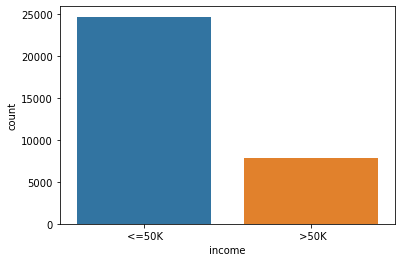

In [1255]:
sns.countplot(ds.income);

In [1256]:
y = pd.get_dummies(ds.income, drop_first=True, prefix='income_')

In [1257]:
y.head(3)

,income__ >50K
0,0
1,0
2,0


income__ >50K
0                24720
1                 7841
dtype: int64


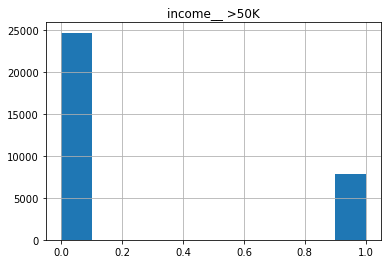

In [1258]:
print(y.value_counts())
y.hist();

### -------------------------Train Test-----------------------------

In [1259]:
from sklearn.model_selection import train_test_split

In [1260]:
X_train, X_test, y_train, y_test = train_test_split(ds.drop(['income'], axis=1), y, test_size=0.3, random_state=42)

In [1261]:
ds.shape, X_train.shape[0] + X_test.shape[0], y_train.shape[0] + y_test.shape[0]

((32561, 15), 32561, 32561)

### ---------------- equalize y --------------------------

In [1262]:
y_train.value_counts().to_frame()

,0
income__ >50K,
0,17265
1,5527


In [1263]:
count_adds = y_train.value_counts().values[0] - y_train.value_counts().values[1]
count_adds

11738

In [1264]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [1265]:
ds_train = X_train.copy(deep=True)
ds_train['y'] = y

In [1266]:
np.random.seed(0)
indexes_for_search = ds_train[ds_train.y == 1].index
indexes_to_adds = np.random.choice(indexes_for_search, count_adds)

In [1267]:
ds_adds = ds_train.loc[indexes_to_adds]

In [1268]:
ds_train = ds_train.append(ds_adds, ignore_index=True)

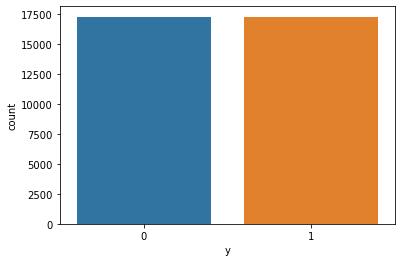

In [1269]:
sns.countplot(ds_train.y);

In [1270]:
from sklearn.utils import shuffle

In [1271]:
ds_train = shuffle(ds_train)

In [1272]:
ds_train.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
29164,50,State-gov,116211,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,52,United-States,1
6518,24,Local-gov,117109,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,27,United-States,0
32002,53,Private,55861,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,1


### ----------------- metrics -------------------

In [1273]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [1274]:
from sklearn.linear_model import LogisticRegression

In [1275]:
def plot_roc_auc(actual, predicted):
    fpr, tpr, threshold = roc_curve(actual, predicted)
    auc_score = roc_auc_score(actual, predicted)
    
    plt.plot(fpr, tpr, label='ROC_curve', c='b')
    plt.xlabel('false_positive')
    plt.ylabel('true_positive')
    plt.plot([0.0, 1.0], [0.0, 1.0], c='r')
    plt.xlim([0.0, 1.005])
    plt.ylim([0.0, 1.005])
    plt.title('ROC_AUC {:.3f}'.format(auc_score))
    plt.show()

In [1276]:
def print_metrics(actual, predicted):
    print('Accuracy: ', accuracy_score(actual, predicted))
    print('Precision: ', precision_score(actual, predicted))
    print('Recall: ', recall_score(actual, predicted))
    print('F1: ', f1_score(actual, predicted))

In [1277]:
ds_train.age.shape, ds_train.y.shape

((34530,), (34530,))

### ------------------- let`s analyze feature "age", numeric or categorical --------------------------

In [1278]:
ds_train['age'].head(3)

29164    50
6518     24
32002    53
Name: age, dtype: int64

In [1279]:
type(ds_train.y)

pandas.core.series.Series

In [1280]:
model_log_reg = LogisticRegression()

In [1281]:
model_log_reg.fit(ds_train['age'].values.reshape(-1, 1), ds_train['y'].values.reshape(-1, 1))

LogisticRegression()

In [1282]:
y_predict = model_log_reg.predict(ds_train['age'].values.reshape(-1, 1))
y_predict_proba = model_log_reg.predict_log_proba(ds_train['age'].values.reshape(-1, 1))

In [1283]:
ds_train.y.values

array([1, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [1284]:
y_predict

array([1, 0, 1, ..., 0, 1, 0], dtype=uint8)

#### -------------- age -> numeric ---------------------- 

In [1285]:
print_metrics(ds_train.y.values, y_predict)

Accuracy:  0.6327830871705763
Precision:  0.637828413395058
Recall:  0.6144801621778164
F1:  0.6259366334297009


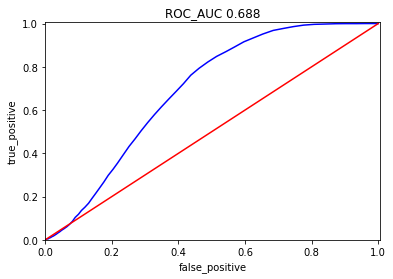

In [1286]:
plot_roc_auc(ds_train.y, y_predict_proba[:, 1])

#### -------------------- age - > categorical --------------------------

In [1287]:
age = pd.get_dummies(ds_train.age)

In [1288]:
age

,17,18,19,20,21,22,23,24,25,26,...,80,81,82,83,84,85,86,87,88,90
29164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6518,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19078,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1289]:
model_log_reg = LogisticRegression()

In [1290]:
model_log_reg.fit(age, ds_train.y)

LogisticRegression()

In [1291]:
y_predict = model_log_reg.predict(age)
y_predict_proba = model_log_reg.predict_proba(age)

In [1292]:
print_metrics(ds_train.y, y_predict)

Accuracy:  0.6714161598609905
Precision:  0.6380041967824668
Recall:  0.7924703156675355
F1:  0.7068974425213123


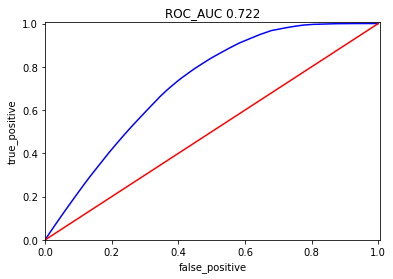

In [1293]:
plot_roc_auc(ds_train.y, y_predict_proba[:, 1])

In [1294]:
ds.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


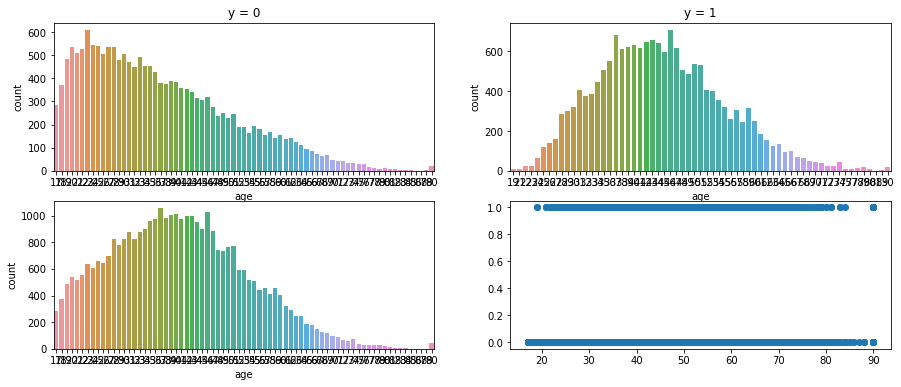

In [1295]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.countplot(ds_train.age[ds_train.y == 0])
plt.title('y = 0')
plt.subplot(2, 2, 2)
plt.title('y = 1')
sns.countplot(ds_train.age[ds_train.y == 1])
plt.subplot(2, 2, 3)
sns.countplot(ds_train.age)
plt.subplot(2, 2, 4)
plt.scatter(ds.age, y);

In [1296]:
ds_train.age.mode(), ds_train.age.median(), ds_train.age.mean()

(0    37
 dtype: int64,
 40.0,
 40.573993628728644)

#### feature 'age' better attributed -> categorical

### -------- split features into numeric and categorical ----------

In [1297]:
columns_numeric = ['fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [1298]:
columns_categorical = list(X_train.columns.values)
for v in columns_numeric:
    columns_categorical.remove(v)  

In [1299]:
columns_categorical

['age',
 'workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

### ----------------------- encoding ---------------------

In [1300]:
c = 0
for col in columns_categorical:
    locals()['train' + col] = pd.get_dummies(ds_train[col], drop_first=True, prefix=str(col))
    c += 1
print(c)

10


### ----------Scaler numeric----------------

In [1301]:
from sklearn.preprocessing import StandardScaler

In [1302]:
y = ds_train.y
ds_train_scaled = ds_train[columns_numeric].copy(deep=True)

In [1303]:
y.shape, ds_train.shape, ds_train_scaled.shape

((34530,), (34530, 15), (34530, 4))

In [1304]:
scaler = StandardScaler().fit(ds_train_scaled)

In [1305]:
ds_train_scaled[columns_numeric] = scaler.transform(ds_train_scaled[columns_numeric])

In [1306]:
ds_train_scaled.head(3)

,fnlwgt,capital_gain,capital_loss,hours_per_week
29164,-0.693653,-0.194988,-0.260795,0.822265
6518,-0.685098,-0.194988,-0.260795,-1.242036
32002,-1.268574,-0.194988,-0.260795,-0.168600


### ---------------- categorical -------------------------------

In [1307]:
for col in columns_categorical:
    ds_add = locals()['train' + col]
    ds_train_scaled = pd.concat([ds_train_scaled, ds_add], axis=1)    

In [1308]:
ds_train_scaled.head(3)

,fnlwgt,capital_gain,capital_loss,hours_per_week,age_18,age_19,age_20,age_21,age_22,age_23,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
29164,-0.693653,-0.194988,-0.260795,0.822265,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6518,-0.685098,-0.194988,-0.260795,-1.242036,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32002,-1.268574,-0.194988,-0.260795,-0.168600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1309]:
ds_train_scaled.shape, y.shape

((34530, 185), (34530,))

### ------------------ base line ----------------------

In [1310]:
model_log_reg = LogisticRegression()

In [1311]:
model_log_reg.fit(ds_train_scaled, y)

LogisticRegression()

In [1312]:
y_predict = model_log_reg.predict(ds_train_scaled)
y_predict_proba = model_log_reg.predict_proba(ds_train_scaled)

In [1313]:
print_metrics(actual=y, predicted=y_predict)

Accuracy:  0.8359397625253403
Precision:  0.8187163424552149
Recall:  0.8629597451491456
F1:  0.8402560415080506


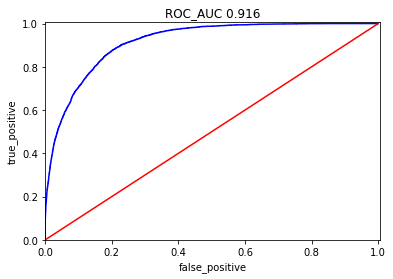

In [1314]:
plot_roc_auc(actual=y, predicted=y_predict_proba[:, 1])

In [1315]:
model_log_reg.coef_.shape, ds_train_scaled.columns.shape

((1, 185), (185,))

### ----------- check test -----------------

In [1316]:
X_test.shape, y_test.shape

((9769, 14), (9769, 1))

In [1317]:
ds_test_scaled = X_test.copy(deep=True)

In [1318]:
ds_test_scaled[columns_numeric] = scaler.transform(X_test[columns_numeric])
ds_test_scaled = ds_test[columns_numeric]

In [1319]:
ds_test_scaled.head(3)

,fnlwgt,capital_gain,capital_loss,hours_per_week
14160,160178,0,0,38
27048,50567,0,0,40
28868,185908,0,0,55


In [1320]:
c = 0
for col in columns_categorical:
    locals()['test' + col] = pd.get_dummies(X_test[col], drop_first=True, prefix=str(col))
    c += 1
print(c)

10


In [1321]:
for col in columns_categorical:
    ds_add = locals()['test' + col]
    ds_test = pd.concat([ds_test_scaled, ds_add], axis=1)    

In [1322]:
ds_test.head(3)

,fnlwgt,capital_gain,capital_loss,hours_per_week,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
14160,160178,0,0,38,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27048,50567,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28868,185908,0,0,55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1323]:
ds_test_scaled.shape, ds_train_scaled.shape, y.shape, y_test.shape

((9769, 4), (34530, 185), (34530,), (9769, 1))

#### ------------------ comparison train to test encoding ---------------------------

In [1324]:
for col in columns_categorical:
    train_col = locals()['train' + col]
    test_col = locals()['test' + col]
    
    if train_col.shape[1] != test_col.shape[1]:
        print('train: ', train_col.shape[1])
        print('test: ', test_col.shape[1])   
        print('missing features: ', end=' ')
        for feature in train_col.columns:
            if feature not in test_col.columns:
                print(feature, end=' ')
        print('\n')

train:  72
test:  70
missing features:  age_86 age_87 

train:  8
test:  7
missing features:  workclass_ Never-worked 

train:  41
test:  40
missing features:  native_country_ Holand-Netherlands 



#### some features are missing in the test, let`s add them with values == 0

In [1325]:
for col in columns_categorical:
    train_col = locals()['train' + col]
    test_col = locals()['test' + col]
    n = 0
    
    if train_col.shape[1] != test_col.shape[1]:
        for feature in train_col.columns:
            if feature not in test_col.columns:
                test_col[feature] = 0
                n += 1
        if n > 0:
            test_col.sort_index(axis=1, inplace=True)         

### ------------- check shape dataset train and test -----------------------

In [1326]:
ds_test_scaled = X_test.copy(deep=True)

In [1327]:
ds_test_scaled[columns_numeric] = scaler.transform(ds_test_scaled[columns_numeric])
ds_test_scaled = ds_test_scaled[columns_numeric]

In [1328]:
ds_test_scaled.head(3)

,fnlwgt,capital_gain,capital_loss,hours_per_week
14160,-0.274803,-0.194988,-0.260795,-0.333744
27048,-1.319007,-0.194988,-0.260795,-0.168600
28868,-0.029688,-0.194988,-0.260795,1.069981


In [1329]:
for col in columns_categorical:
    ds_add = locals()['test' + col]
    ds_test_scaled = pd.concat([ds_test_scaled, ds_add], axis=1)    

In [1330]:
ds_test_scaled.head(3)

,fnlwgt,capital_gain,capital_loss,hours_per_week,age_18,age_19,age_20,age_21,age_22,age_23,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
14160,-0.274803,-0.194988,-0.260795,-0.333744,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27048,-1.319007,-0.194988,-0.260795,-0.168600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28868,-0.029688,-0.194988,-0.260795,1.069981,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1331]:
ds_test_scaled.shape, ds_train_scaled.shape, y.shape, y_test.shape

((9769, 185), (34530, 185), (34530,), (9769, 1))

####  columns train == columns test

### -------------- test -----------------

In [1332]:
y_pred_test = model_log_reg.predict(ds_test_scaled)
y_pred_proba_test = model_log_reg.predict_proba(ds_test_scaled)

In [1333]:
print_metrics(y_test, y_pred_test)

Accuracy:  0.8122632818098066
Precision:  0.5697269029633933
Recall:  0.8474503025064822
F1:  0.68137595552467


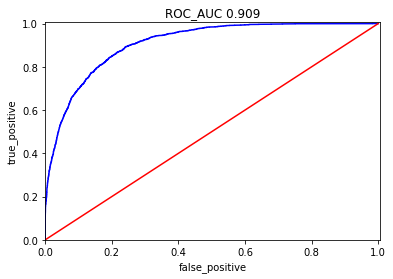

In [1334]:
plot_roc_auc(actual=y_test, predicted=y_pred_proba_test[:, 1])

### --------- model optimization -------------

### --------------- search importance features -------------------------

In [648]:
import sys

In [649]:
featureImportance = pd.DataFrame({'feature': ds_test_scaled.columns, 
                                  'importance': model_log_reg.coef_[0]})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)

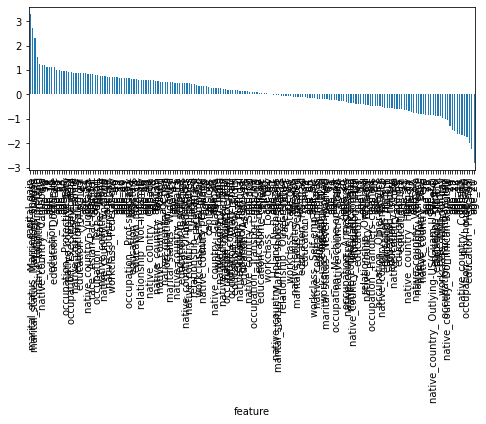

In [650]:
featureImportance.importance.plot(kind='bar', figsize=(8, 3));

In [651]:
featureImportance[abs(featureImportance.importance) < 0.02].index

Index(['workclass_ Local-gov', 'age_31'], dtype='object', name='feature')

In [652]:
coef = list(set(abs(model_log_reg.coef_[0])))
coef = sorted(coef)

### ------------------ model 1 ----------------

In [653]:
accuracy = []
size_data = []

for threshold in coef[: -1]:
    model_lg = LogisticRegression()
    model_lg.fit(ds_train_scaled[featureImportance[abs(featureImportance.importance) > threshold].index], y)
    y_pred = model_lg.predict(ds_train_scaled[featureImportance[abs(featureImportance.importance) > threshold].index])
    accuracy.append(accuracy_score(y, y_pred))
    size = sys.getsizeof(ds_train_scaled[featureImportance[abs(featureImportance.importance) > threshold].index])
    size_data.append(size)   

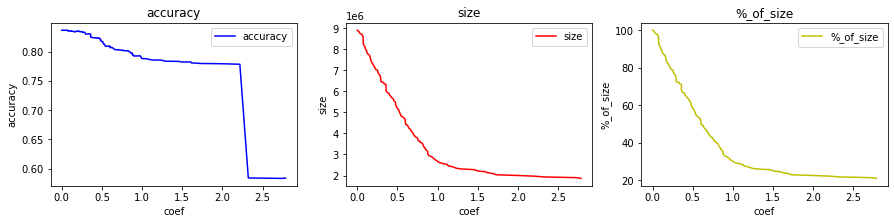

In [654]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(coef[:-1], accuracy, c='b', label='accuracy')
plt.legend()
plt.title('accuracy')
plt.xlabel('coef')
plt.ylabel('accuracy')
plt.subplot(1, 3, 2)
plt.plot(coef[:-1], size_data, c='r', label='size')
plt.legend()
plt.title('size')
plt.xlabel('coef')
plt.ylabel('size')
plt.subplot(1, 3, 3)
plt.plot(coef[:-1], [(v / size_data[0])*100 for v in size_data], c='y', label='%_of_size')
plt.legend()
plt.title('%_of_size')
plt.xlabel('coef')
plt.ylabel('%_of_size')

plt.show();

-you can reduce the data for faster processing, but at the same time our accuracy will become less     
-мы можем уменьшить даннные, но при этом уменьшится accuracy 

-below is a table of the ratio of accuracy and the size of the data     
-ниже представлена таблица соотношения accuracy и размера данных

In [655]:
table_accuracy_size = pd.DataFrame({'accuracy': accuracy, 'size_data': size_data, 
                                    'threshold': coef[:-1],
                                    '%_of_data': [(v / size_data[0])*100 for v in size_data]})

In [656]:
table_accuracy_size[:20]

,accuracy,size_data,threshold,%_of_data
0,0.836287,8907344,0.000234,100.000000
1,0.836316,8872814,0.011064,99.612342
2,0.836345,8838284,0.021925,99.224685
3,0.836432,8803754,0.026234,98.837027
4,0.836316,8769224,0.031737,98.449369
5,0.836287,8734694,0.041466,98.061712
6,0.836229,8700164,0.061267,97.674054
7,0.836114,8665634,0.062560,97.286396
8,0.836316,8631104,0.069176,96.898739
9,0.836374,8596574,0.073694,96.511081


In [657]:
table_accuracy_size[table_accuracy_size.accuracy == np.max(accuracy)]

,accuracy,size_data,threshold,%_of_data
3,0.836432,8803754,0.026234,98.837027


-the max accuracy of the model is achieved by removing some of feature, that made the model noisy     
-максимальное accuracy достигается убрав из модели features, которые зашумляют модель. 

In [658]:
print('features, that need to be removed')
featureImportance[abs(featureImportance.importance) < 0.026234]

features, that need to be removed


,importance
feature,
workclass_ Local-gov,0.011064
age_31,-0.000234
age_87,-0.021925


In [659]:
best_threshold = table_accuracy_size[table_accuracy_size.accuracy == np.max(accuracy)].threshold.values[0]

In [660]:
features_for_model_one = featureImportance[abs(featureImportance.importance) > best_threshold].index.values

In [661]:
model_one = LogisticRegression().fit(ds_train_scaled[features_for_model_one], y)

In [662]:
y_pred_model_one = model_one.predict(ds_test_scaled[features_for_model_one])
y_pred_proba_model_one = model_one.predict_proba(ds_test_scaled[features_for_model_one])

In [663]:
print_metrics(y_test, y_pred_model_one)

Accuracy:  0.8124680110553792
Precision:  0.5699767711962834
Recall:  0.848314606741573
F1:  0.6818339701285168


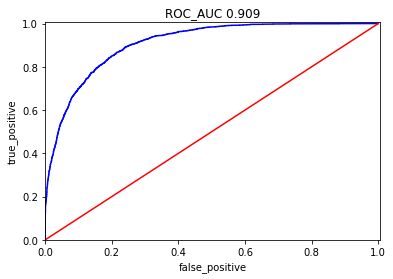

In [664]:
plot_roc_auc(y_test, y_pred_proba_model_one[:, 1])

-model free noisy features   
-модель без зашумляющих features

### ------------------ model 2 ------------------

#### transform numeric features

In [665]:
columns_numeric

['fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [666]:
def plot_hist_boxplot(ds):
    plt.figure(figsize=(20, 6))
    for i, col in enumerate(columns_numeric):
        
        plt.subplot(2, 4, i+1)
        ds_train[col].hist(bins=20)
        plt.title(col)
        plt.subplot(2, 4, i+5)
        sns.boxplot(ds_train[col]);

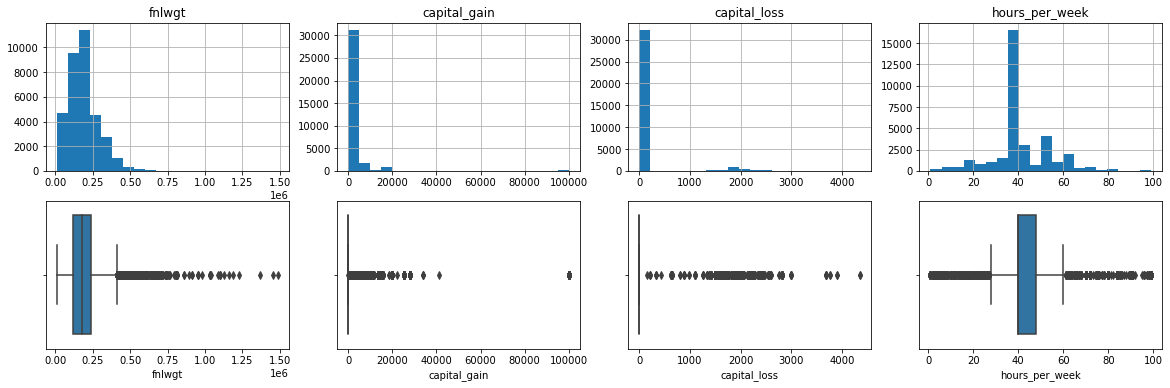

In [667]:
plot_hist_boxplot(X_train)

### ------------ logarithm -------------------

In [668]:
ds_train_trans = X_train.copy(deep=True)

In [669]:
ds_train_trans['fnlwgt'] = np.log(X_train['fnlwgt'])
ds_train_trans['capital_gain'] = np.log(X_train['capital_gain'])
ds_train_trans['capital_loss'] = np.log(X_train['capital_loss'])

#### drop inf

In [670]:
def replace_inf(data):
    data = data.replace(np.inf, 99999)
    data = data.replace(-np.inf, -99999)
    
    upper_index = data[data == 99999].index
    lower_index = data[data == -99999].index
    
    data[upper_index] = data[data != 99999].max()
    data[lower_index] = data[data != -99999].min()
    
    return data

In [671]:
ds_train_trans['fnlwgt'] = replace_inf(ds_train_trans['fnlwgt'])
ds_train_trans['capital_gain'] = replace_inf(ds_train_trans['capital_gain'])
ds_train_trans['capital_loss'] = replace_inf(ds_train_trans['capital_loss'])

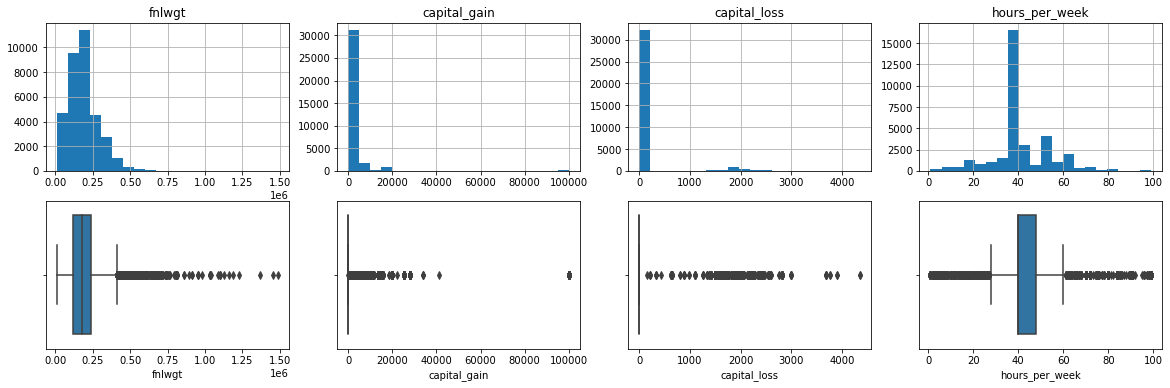

In [672]:
plot_hist_boxplot(ds_train_trans)

-logarithm and impute outliers the 'fnlwgt'    
-remove outliers from: 'capital_gain', 'capital_loss', 'hours_per_week'

In [673]:
def impute_outliers(data, threshold=1.5):
    IQR = data.quantile(0.75) - data.quantile(0.25)
    upper_fence = data.quantile(0.75) + (IQR * threshold)
    lower_fence = data.quantile(0.25) - (IQR * threshold)
    
    upper_index = data[data > upper_fence].index
    lower_index = data[data < lower_fence].index
    
    data[upper_index] = upper_fence
    data[lower_index] = lower_fence
    
    return data

In [674]:
ds_train.shape, y.shape

((34530, 15), (34530,))

In [675]:
ds_train.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
29164,50,State-gov,116211,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,52,United-States,1
6518,24,Local-gov,117109,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,27,United-States,0


### --------------- start ---------------------

In [1232]:
ds_train_trans = ds_train_scaled.copy(deep=True)
ds_train_trans[columns_numeric] = ds_train[columns_numeric].copy(deep=True)

In [1233]:
ds_train_trans.shape

(34530, 185)

In [1234]:
ds_train_trans['fnlwgt'] = impute_outliers(np.log(ds_train['fnlwgt']))
#ds_train_trans['capital_gain'] = impute_outliers(ds_train['capital_gain'])  # degrades the model
#ds_train_trans['capital_loss'] = impute_outliers(ds_train['capital_loss'])  # degrades the model
ds_train_trans['hours_per_week'] = impute_outliers(ds_train['hours_per_week'])

In [1235]:
scaler = StandardScaler().fit(ds_train_trans[columns_numeric])

In [1236]:
ds_train_trans[columns_numeric] = scaler.transform(ds_train_trans[columns_numeric])

In [1237]:
ds_train_trans.shape

(34530, 185)

In [1238]:
model = LogisticRegression().fit(ds_train_trans, y)

In [1239]:
y_pred = model.predict(ds_train_trans)
y_pred_pob = model.predict_proba(ds_train_trans)

In [1240]:
print_metrics(y, y_pred)

Accuracy:  0.8366348103098755
Precision:  0.819727142699967
Recall:  0.8630755864465682
F1:  0.8408430437604041


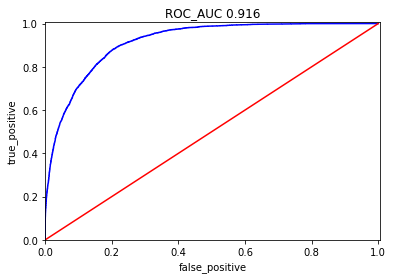

In [1241]:
plot_roc_auc(y, y_pred_pob[:, 1])

In [1363]:
ds_test_trans = ds_test_scaled.copy(deep=True)
ds_test_trans[columns_numeric] = X_test[columns_numeric].copy(deep=True)

In [1364]:
ds_test_trans.shape, y_test.shape

((9769, 185), (9769, 1))

In [1365]:
ds_test_trans['fnlwgt'] = np.log(ds_test_trans['fnlwgt'])

In [1366]:
ds_test_trans[columns_numeric] = scaler.transform(ds_test_trans[columns_numeric])

In [1367]:
y_pred = model.predict(ds_test_trans)
y_pred_pob = model.predict_proba(ds_test_trans)

### --------------best accuracy model-------------------------

In [1368]:
print_metrics(y_test, y_pred)

Accuracy:  0.8208619101238612
Precision:  0.5867158671586716
Recall:  0.8245462402765773
F1:  0.6855910887531441


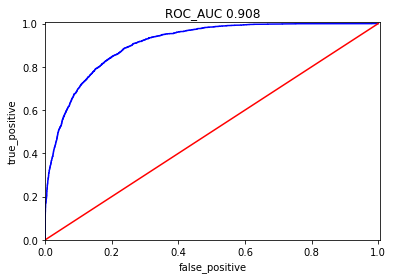

In [1369]:
plot_roc_auc(y_test, y_pred_pob[:, 1])

In [1370]:
featureImportance = pd.DataFrame({'feature': ds_test_trans.columns, 
                                  'importance': model.coef_[0]})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)

In [1371]:
coef = list(set(abs(model.coef_[0])))
coef = sorted(coef)

In [1372]:
accuracy = []
size_data = []

for threshold in coef[: -1]:
    model_lg = LogisticRegression()
    model_lg.fit(ds_train_trans[featureImportance[abs(featureImportance.importance) > threshold].index], y)
    y_pred = model_lg.predict(ds_train_trans[featureImportance[abs(featureImportance.importance) > threshold].index])
    accuracy.append(accuracy_score(y, y_pred))
    size = sys.getsizeof(ds_train_trans[featureImportance[abs(featureImportance.importance) > threshold].index])
    size_data.append(size)   

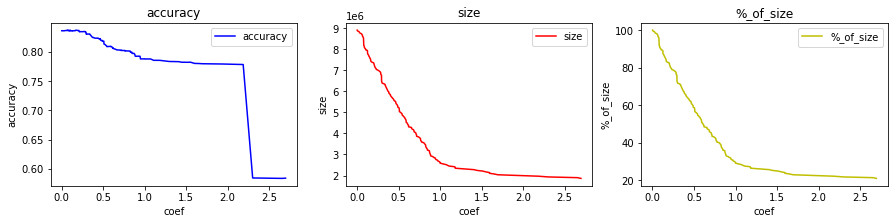

In [1373]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(coef[:-1], accuracy, c='b', label='accuracy')
plt.legend()
plt.title('accuracy')
plt.xlabel('coef')
plt.ylabel('accuracy')
plt.subplot(1, 3, 2)
plt.plot(coef[:-1], size_data, c='r', label='size')
plt.legend()
plt.title('size')
plt.xlabel('coef')
plt.ylabel('size')
plt.subplot(1, 3, 3)
plt.plot(coef[:-1], [(v / size_data[0])*100 for v in size_data], c='y', label='%_of_size')
plt.legend()
plt.title('%_of_size')
plt.xlabel('coef')
plt.ylabel('%_of_size')

plt.show();

In [1374]:
table_accuracy_size = pd.DataFrame({'accuracy': accuracy, 'size_data': size_data, 
                                    'threshold': coef[:-1],
                                    '%_of_data': [(v / size_data[0])*100 for v in size_data]})

In [1375]:
table_accuracy_size[:20]

,accuracy,size_data,threshold,%_of_data
0,0.835998,8907344,0.001118,100.000000
1,0.836027,8872814,0.004469,99.612342
2,0.835882,8838284,0.022260,99.224685
3,0.835824,8803754,0.027439,98.837027
4,0.836027,8769224,0.034024,98.449369
5,0.836461,8734694,0.052768,98.061712
6,0.836693,8665634,0.064290,97.286396
7,0.836287,8631104,0.064383,96.898739
8,0.836229,8596574,0.069323,96.511081
9,0.837011,8562044,0.074349,96.123424


In [1376]:
table_accuracy_size[table_accuracy_size.accuracy == np.max(accuracy)]

,accuracy,size_data,threshold,%_of_data
9,0.837011,8562044,0.074349,96.123424


In [1377]:
print('features, that need to be removed')
featureImportance[abs(featureImportance.importance) < 0.074349]

features, that need to be removed


,importance
feature,
age_62,0.064383
education_num_10,0.064290
education_ Some-college,0.064290
workclass_ Local-gov,0.052768
marital_status_ Married-spouse-absent,0.004469
age_31,-0.001118
native_country_ Holand-Netherlands,-0.022260
workclass_ State-gov,-0.027439
age_87,-0.034024


In [1378]:
best_threshold = table_accuracy_size[table_accuracy_size.accuracy == np.max(accuracy)].threshold.values[0]

In [1379]:
features_for_model_2 = featureImportance[abs(featureImportance.importance) > best_threshold].index.values

In [1380]:
features_for_model_2.shape

(174,)

In [1381]:
model_2 = LogisticRegression().fit(ds_train_trans[features_for_model_2], y)

In [1382]:
y_pred_model_2 = model_2.predict(ds_test_trans[features_for_model_2])
y_pred_proba_model_2 = model_2.predict_proba(ds_test_trans[features_for_model_2])

In [1383]:
print_metrics(y_test, y_pred_model_2)

Accuracy:  0.8199406285187839
Precision:  0.5854108956602031
Recall:  0.8219533275713051
F1:  0.6838037030379291


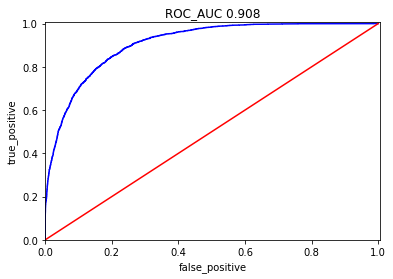

In [1384]:
plot_roc_auc(y_test, y_pred_proba_model_2[:, 1])

In [1400]:
model_3 = LogisticRegression().fit(ds_train_trans[features_for_model_one], y)

In [1401]:
y_pred_3 = model_3.predict(ds_test_trans[features_for_model_one])
y_pred_pob_3 = model_3.predict_proba(ds_test_trans[features_for_model_one])

In [1402]:
print_metrics(y_test, y_pred_3)

Accuracy:  0.820247722387143
Precision:  0.585635359116022
Recall:  0.8245462402765773
F1:  0.6848528356066045


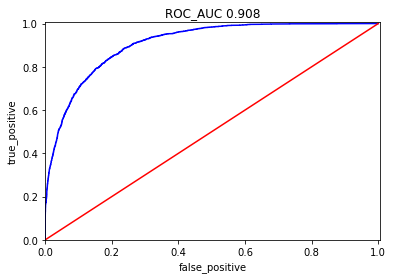

In [1405]:
plot_roc_auc(y_test, y_pred_pob_3[:, 1])